<a href="https://colab.research.google.com/github/DLPietro/learning-roadmap/blob/main/notebooks/day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Day 6 – Data Cleaning & Basic Stats with Pandas

Main Goals

- Learn how to handle missing values in financial data
- Practice descriptive statistics with pandas (.mean(), .std(), .describe())
- Normalize data for easier comparison across assets


1) Preparatory Exercise - Using a Sample with missing values (NaN)

In [6]:
import pandas as pd, numpy as np

data_sample = {"Asset_1": [np.nan,140,135,142,np.nan],
               "Asset_2": [300,np.nan,310,308,307],
               "Asset_3": [451,455,453,452,450]
}

sample = pd.DataFrame(data_sample)
print("Original sample with Missing Values: \n", sample)

# 2 Alternative, filling missing data or removing them all
sample_filled = sample.fillna(method="ffill")
sample_dropped = sample.dropna()
print({"Sample with filled NaN": sample_filled,
       "Sample with dropped NaN": sample_dropped})

Original sample with Missing Values: 
    Asset_1  Asset_2  Asset_3
0      NaN    300.0      451
1    140.0      NaN      455
2    135.0    310.0      453
3    142.0    308.0      452
4      NaN    307.0      450
{'Sample with filled NaN':    Asset_1  Asset_2  Asset_3
0      NaN    300.0      451
1    140.0    300.0      455
2    135.0    310.0      453
3    142.0    308.0      452
4    142.0    307.0      450, 'Sample with dropped NaN':    Asset_1  Asset_2  Asset_3
2    135.0    310.0      453
3    142.0    308.0      452}


/tmp/ipython-input-1437800059.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sample_filled = sample.fillna(method="ffill")


2) Main Task – Cleaning & Descriptive Stats on Financial Data

In [13]:
import yfinance as yf, pandas as pd, numpy as np                   # Importing them in a single row

# Step 1: Download closing price of the 3 tickers of the last 90 days
tickers = ['IWM', 'GLD', 'IGOV']                                   # Defined tickets
data = yf.download(tickers, period = '90d')                        # Selected Period = 90 days
close_prices = data['Close']

# Step 2: Check and fill missing values
print("Missing values per asset:\n", close_prices.isna().sum())
close_cleaned = close_prices.fillna(method = "ffill")

# Step 3: First Descriptive stats
print("\nDescriptive Statistics:\n", close_cleaned.describe())

# Step 4: Normalise values (starting from first Value = 100)
normalized = close_cleaned / close_cleaned.iloc[0] * 100
print("\nNormalized Prices:\n", normalized.head())

/tmp/ipython-input-46744165.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period = '90d')                        # Selected Period = 90 days
[*********************100%***********************]  3 of 3 completed

Missing values per asset:
 Ticker
GLD     0
IGOV    0
IWM     0
dtype: int64

Descriptive Statistics:
 Ticker         GLD       IGOV         IWM
count    90.000000  90.000000   90.000000
mean    308.584310  42.090000  216.927885
std       6.877251   0.547033   11.081754
min     293.160004  40.470001  194.322693
25%     305.437500  41.817499  208.333942
50%     307.800003  42.155001  219.105003
75%     310.907501  42.425000  224.069996
max     334.417999  43.189999  237.770004

Normalized Prices:
 Ticker             GLD        IGOV         IWM
Date                                          
2025-04-30  100.000000  100.000000  100.000000
2025-05-01   97.922771   99.236642  100.620959
2025-05-02   98.093960   99.308213  102.884116
2025-05-05  101.023806   99.379775  102.093806
2025-05-06  103.854898   99.952298  100.980194



/tmp/ipython-input-46744165.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_cleaned = close_prices.fillna(method = "ffill")


3) Consolidation exercise - Rolling Stats

In [10]:
rolling_mean = close_cleaned.rolling(window=30).mean()
rolling_std = close_cleaned.rolling(window=30).std()

print("\n30-Day Rolling Mean:\n", rolling_mean.tail())
print("\n30-Day Rolling Std:\n", rolling_std.tail())


30-Day Rolling Mean:
 Ticker             GLD       IGOV         IWM
Date                                         
2025-09-02  310.061662  42.219333  226.126001
2025-09-03  310.462995  42.197000  226.472667
2025-09-04  310.946662  42.176667  226.803001
2025-09-05  311.639329  42.178000  227.277001
2025-09-08  312.512536  42.184667  227.723334

30-Day Rolling Std:
 Ticker           GLD      IGOV       IWM
Date                                    
2025-09-02  4.714079  0.287690  5.843829
2025-09-03  5.662907  0.268857  5.975553
2025-09-04  6.387856  0.252045  6.254801
2025-09-05  7.364006  0.254347  6.532429
2025-09-08  8.333327  0.264155  6.780399


4) Plot of normalised prices

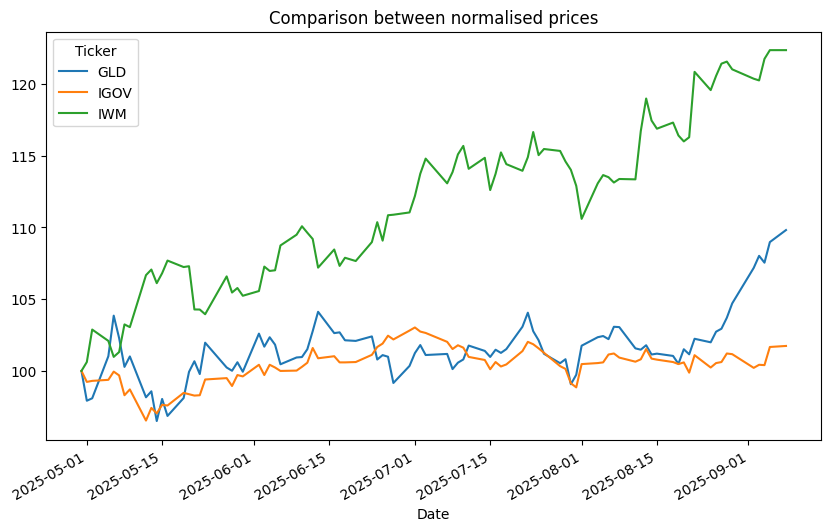

In [12]:
import matplotlib.pyplot as plt

normalized.plot(figsize = (10, 6), title = "Comparison between normalised prices")
plt.show()